In [55]:
import numpy as np
from matplotlib import pyplot as plt
from ruamel.yaml import YAML
yaml = YAML(typ='safe')

In [494]:
fil = open("photo_new_new.dat")
lines = fil.readlines()
fil.close()

fil = open("SW_new_new.DAT")
lines_sw = fil.readlines()
fil.close()

inds = [1, 158, 196, 267, 396]
num = []
wav = []
wav_av = []
for line in lines[inds[0]+1:]:
    if line == '\n':
        break
    num.append(int(line.split()[0]))
    wav.append([float(a) for a in line.split()[1].split('-')])
    wav_av.append(np.mean(wav[-1])/10)

In [573]:
#H2S
sp = 'CS2'
xs_lw = 11*[0.]+[1.e-20, 1.5e-20, 2.5e-20, 4.e-20, 7.e-20]+\
[8.e-20, 7.5e-20, 5.e-20, 2.5e-20, 2.e-20, 1.e-20]+ 51*[0.0]

xs = 7*[0.]+[7.e-17,9.0e-17,1.2e-16,2.0e-16,4.0e-16]+\
3*[4.5E-16]+[2.5E-16, 1.5E-16, 1.0e-16, 5.0e-17, 3.0e-17]+\
15*[0.0]

xs = xs+xs_lw

wav_save = wav_av[:len(xs)]

In [ ]:
sp = 'SO2'

i = -1

paths = ['so2(so+0)',    'so2(1so2)',    's02(3so2)']

xs = [0 for i in range(68)]
for path in paths[:-1]:

    ind = lines[inds[i]-1].split().index(path)+1

    for j,line in enumerate(lines[inds[i]+1:]):
        if line == '\n':
            break
        xs[j]+=float(line.split()[ind])

wav_save = wav_av[:len(xs)]


In [486]:
sp = 'S8L'
xs_tot = [1.E-18,1.E-18]
wav_tot = [wav_av[0],wav_av[-1]]

In [562]:
# N2
sp = 'N2'
xs_tot = 14*[0.]+[1.e-17,2.5e-16,1.e-17]
xs_tot = xs_tot[::-1]
wav_tot = wav_sw[:len(xs)]

In [ ]:
#CO
sp = 'CO'
xs_tot = 14*[0.]+3*[1.e-17]
xs_tot = xs_tot[::-1]
wav_tot = wav_sw[:len(xs)]

In [710]:
# HS
sp = 'HS'
xs_tot = 45*[0]+[3.e-18, 5.e-19, 1.e-17, 1.6e-17, 1.5e-18, 6.e-19,\
     7.e-17, 3.e-17, 2.e-18, 2.e-19, 3.e-20,\
     1.e-20,2.e-19,1.e-20,4.e-22, 2.e-21, 5.e-22, 5.e-23,\
     8.e-24, 8.e-24, 4.e-24, 1.e-24, 0.]

wav_tot = wav_av[:len(xs)]


In [707]:
len(xs_tot)

68

In [690]:
sp = 'H2O2'

i = 2
try:
    ind = lines[inds[i]-1].split().index('H202')-0

    xs = []
    for line in lines[inds[i]+1:]:
        if line == '\n':
            break
        xs.append(float(line.split()[ind]))

    wav_save = wav_av[:len(xs)]
except:
    print('no lw data')
    xs = []
    wav_save = []

In [691]:
xs

[7e-19,
 7e-19,
 7e-19,
 7e-19,
 7e-19,
 7e-19,
 7e-19,
 7e-19,
 7e-19,
 6.5e-19,
 6e-19,
 5.6e-19,
 5.3e-19,
 4.9e-19,
 4.6e-19,
 4.3e-19,
 4e-19,
 3.8e-19,
 3.5e-19,
 3.3e-19,
 3.1e-19,
 2.9e-19,
 2.7e-19,
 2.5e-19,
 2.3e-19,
 2.2e-19,
 1.9e-19,
 1.7e-19,
 1.6e-19,
 1.4e-19,
 1.3e-19,
 1.1e-19,
 1e-19,
 9e-20,
 8e-20,
 6.8e-20,
 5.8e-20,
 5e-20,
 4.2e-20,
 3.5e-20,
 3e-20,
 2.5e-20,
 2e-20,
 1.7e-20,
 1.3e-20,
 1e-20,
 8e-21,
 6.7e-21,
 5e-21,
 3.7e-21,
 2.8e-21,
 2e-21,
 1.5e-21,
 1.2e-21,
 9e-22,
 7e-22,
 5e-22,
 3e-22,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [692]:
# search short wavlength

sp1 = sp

try:
    ind = lines_sw[0].split().index(sp1)
    
    wav_sw = []
    for line in lines_sw[2:]:
        wav_sw.append(float(line.split()[-1])/10)

    wav_sw = wav_sw[::-1]

    xs_sw = []
    for line in lines_sw[2:]:
        xs_sw.append(float(line.split()[ind]))

    xs_sw = xs_sw[::-1]

    # knit together
    wav_tot = wav_sw+wav_save
    xs_tot = xs_sw+xs

except:
    print('no sw data')
    wav_tot = wav_save
    xs_tot = xs

    

no sw data


In [693]:
sp

'H2O2'

In [711]:
sp1 = sp
fil=open('../xsections'+'/'+sp1+'/'+sp1+'_xs.txt')
lines_old = fil.readlines()
fil.close()

xs_old = []
wav_old = []
for line in lines_old[2:]:
    xs_old.append(float(line.split()[1]))
    wav_old.append(float(line.split()[0]))


FileNotFoundError: [Errno 2] No such file or directory: '../xsections/HS/HS_xs.txt'

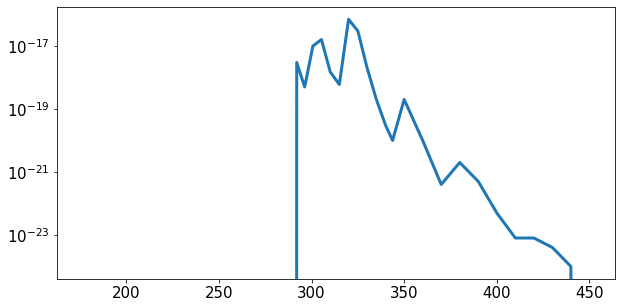

In [712]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize = [10,5])

ax.plot(wav_tot,xs_tot,lw=3)
# ax.plot(wav_old,xs_old)

# ax.set_xlim(290,360)

ax.set_yscale('log')


plt.show()

In [713]:
sp

'HS'

In [714]:
import subprocess
subprocess.call('mkdir '+sp,shell=True)

fil = open(sp+'/'+sp+'_xs.txt','w')
fil.write(sp+' (wavelength = nm, xs = cm2/molecule)\n')
fil.write('wavelength          300K                \n')

for i in range(len(wav_tot)):
    fil.write('{:20}'.format('%.8e'%wav_tot[i]))
    fil.write('{:20}'.format('%.8e'%xs_tot[i])+'\n')

fil.close()

In [715]:
fil = open('zahnle_earth_photos.yaml','r')
rxs = yaml.load(fil)
fil.close()


In [716]:
paths = []
for rx in rxs:
    if rx['equation'].split()[0]==sp:
        paths.append(rx['equation'])
qy_names = []
for path in paths:
    qy_names.append(path.replace(' ','_')+'.txt')
    
print(qy_names)

['HS_+_hv_=>_H_+_S.txt']


In [717]:

i = 0

fil = open(sp+'/'+qy_names[i],'w')
fil.write(qy_names[i]+'\n')
fil.write('wavelength          300K                \n')

# for i in range(len(wav_tot)):

fil.write('{:20}'.format('%.8e'%wav_tot[0]))
fil.write('{:20}'.format('%.8e'%(1.00))+'\n')

fil.write('{:20}'.format('%.8e'%wav_tot[-1]))
fil.write('{:20}'.format('%.8e'%(1.00))+'\n')

fil.close()

In [719]:

import os
photospec = []
for rx in rxs:
    photospec.append(rx['equation'].split()[0])


directories = [a for a in os.listdir() if os.path.isdir(a) and a[0]!='.']
try:
    directories.remove('__pycache__')
except:
    pass

set(photospec).symmetric_difference(set(directories))

{'CO2', 'H2CO', 'HNO', 'HNO2', 'O2', 'O3', 'SO2'}